# TEST pyBioPlot package
** This notebook contains tests for all function contained in pyBioPlot package **

In [1]:
# For ipython inline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Import of required packages
import pandas as pd

# import all function from pyBioPlot
from pyBioPlot import *

---
# RNASeq plots

## volcano_plot

In [2]:
help(volcano_plot)

Help on function volcano_plot in module pyBioPlot:

volcano_plot(df, X, Y, FDR=1, X_cutoff=1, sig_pos_color='0.5', sig_neg_color='0.7', non_sig_color='0.9', highlight_list=[], highlight_palette='Set1', highlight_FDR=None, highlight_min_targets=0, **kwargs)
    Plot a volcano plot with matplot lib from a dataframe in “stacked” or “record” format
    *  df
        Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
        identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    *  X
        Name of the column for X plotting (usually log2FC)
    *  Y
        Name of the column for Y plotting (usually pvalue)
    *  FDR
        false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 1]
    *  X_cutoff
        value for significance cut-off for the X axis [DEFAULT: 1]
    *  sig_pos_color
        Color of the sign

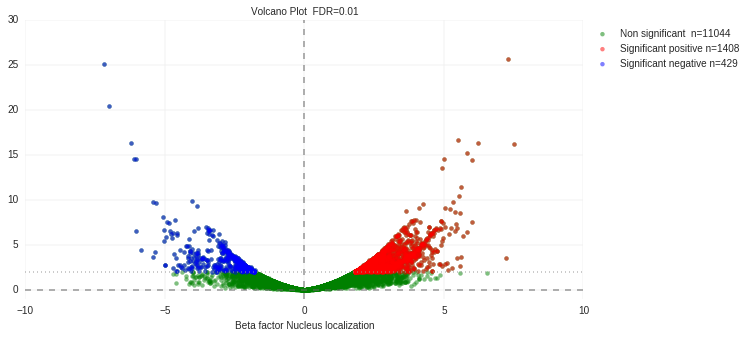

In [3]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
volcano_plot(df, "b", "qval", FDR=0.01, X_cutoff=2, figsize=[10,5], xlim=[-10,10], ylim=[-1, 30], sig_pos_color="red", sig_neg_color="blue",
             non_sig_color="green", xlabel="Beta factor Nucleus localization")

Target_id list of dataframe required for series #0. Skipping to the next one


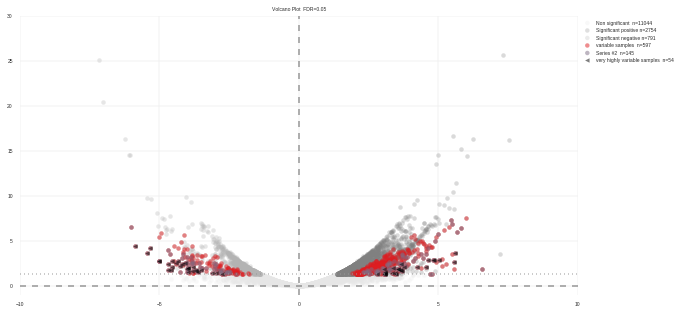

In [4]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
highlight_list = [
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 0.2)], "label":"variable samples", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 0.4)]},
    {"target_id":df.target_id[(df.tech_var >= 0.7)], "color":"black", "label":"very highly variable samples", "marker":"<"}]

volcano_plot(df, "b", "qval", figsize=[10,5], xlim=[-10,10], ylim=[-1, 30], highlight_list= highlight_list,
             alpha=0.25, highlight_FDR=0.05, FDR=0.05, fontsize=5)

## MA_plot

In [3]:
help(MA_plot)

Help on function MA_plot in module pyBioPlot:

MA_plot(df, X, Y, FDR=1, FDR_col='pval', sig_pos_color='0.5', sig_neg_color='0.7', non_sig_color='0.9', highlight_list=[], highlight_palette='Set1', highlight_FDR=None, highlight_min_targets=0, **kwargs)
    Plot a MA plot with matplotlib from a dataframe in “stacked” or “record” format
    *  df
        Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
        identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    *  X
        Name of the column for X plotting (usually Mean expression)
    *  Y
        Name of the column for Y plotting (usually log2FC)
    *  FDR
        False discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 1]
    *  FDR_col
        Name of the column to use to determine the significance cut-off (usually pvalue)
    *  sig_pos_color
       

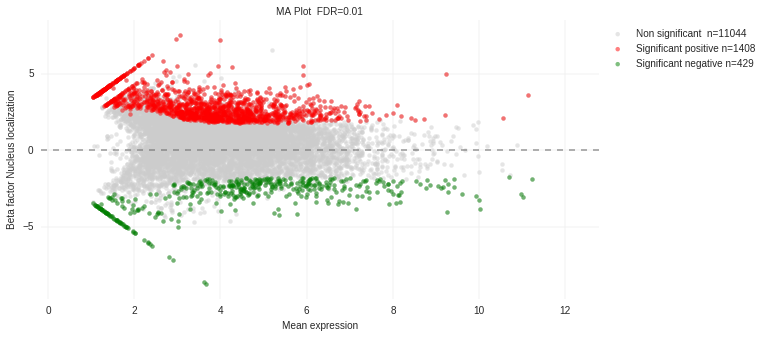

In [6]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
MA_plot(df, "mean_obs", "b", FDR=0.01, FDR_col="qval", figsize=[10,5], sig_pos_color="red", sig_neg_color="green", non_sig_color="0.8",
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization")

Target_id list of dataframe required for series #1. Skipping to the next one


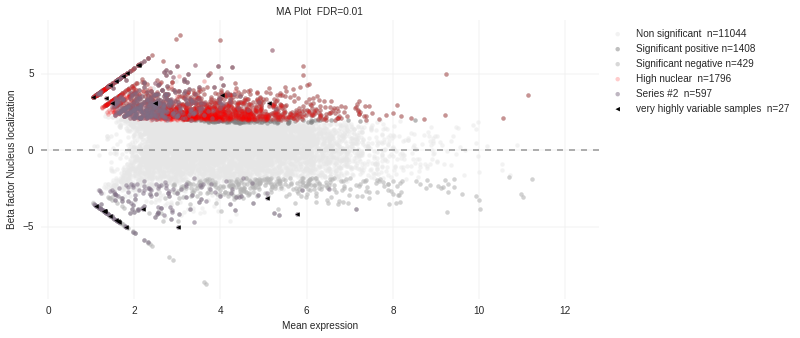

In [7]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")

hl = [
    {"df":df[(df.b>2)], "label":"High nuclear", "color":"red","alpha":0.2},
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 0.2)]},
    {"target_id":df.target_id[(df.tech_var >= 1)], "color":"black", "label":"very highly variable samples", "alpha":1, "marker":"<"}]

MA_plot(
        df = df,
        X= "mean_obs",
        Y= "b",
        FDR=0.01,
        FDR_col="qval",
        highlight_list=hl,
        figsize=[10,5],
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization",
        alpha=0.5,
        highlight_FDR=0.05)

## density_plot

In [4]:
help(density_plot)

Help on function density_plot in module pyBioPlot:

density_plot(df, X, FDR=None, FDR_col='pval', cumulative=False, cut=3, highlight_list=[], highlight_palette='Set1', highlight_FDR=None, highlight_min_targets=0, **kwargs)
    Plot a density with matplotlib from a dataframe in “stacked” or “record” format
    *  df
        Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
        identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    *  X
        Name of the column to calculate density (usually Mean expression)
    *  FDR
        false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: None]
    *  FDR_col
        Name of the column to use to determine the significance cut-off (usually pvalue)
    *  cumulative
        If true, will plot a cumulative distribution [DEFAULT: 1]
    *  highlight_list
        L

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


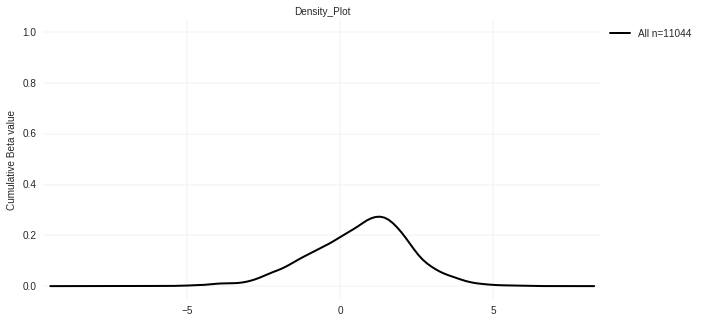

In [9]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
density_plot(df, "b", figsize=[10,5], ylabel="Cumulative Beta value")

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Target_id list of dataframe required for series #1. Skipping to the next one


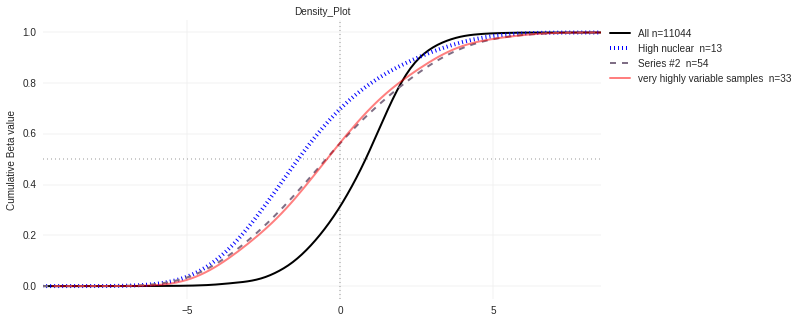

In [10]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")

df2 = df[(df.mean_obs>10)]

hl = [
    {"df":df2, "label":"High nuclear", "color":"blue","linestyle":':', "linewidth":4},
    {"label":"mock", "alpha":0.5},
    {"target_id":df.target_id[(df.tech_var >= 1.3)], "linestyle":'--'},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"red", "label":"very highly variable samples", "alpha":0.5, "marker":"<"}]


density_plot(df, "b", figsize=[10,5], ylabel="Cumulative Beta value", highlight_list= hl, cumulative = True, cut=5)

## PCA_var_plot

In [5]:
help(PCA_var_plot)

Help on function PCA_var_plot in module pyBioPlot:

PCA_var_plot(df, variable_col, sample_col, value_col, plot_style='ggplot', **kwargs)
    Plot a the frequence of contribution to the variance of the principal componants from a dataframe in “stacked” or “record” format
    *  df
        A pandas dataframe with a least the 3 following columns:
        - variable_col = column containing variable identifiers (such as gene identifiers)
        - sample_col = column containing sample identifiers (such as experimental condition)
        - value_col = column containing quantitative numeric values
    *  variable_col
        Name or index of the column containing variable identifiers
    *  sample_col
        Name or index of the column containing sample identifiers
    *  value_col
        Name or index of the column containing values
    *  plot_style
        Default plot style for pyplot ('grayscale'|'bmh'|'ggplot'|'dark_background'|'classic'|'fivethirtyeight'...)[ DEFAULT: "ggplot" ]
    

,target_id,sample,est_counts,tpm,eff_len,len
1,ENST00000222396.9,HeLaS3_cytosol_1,2.919048,0.701134,349.145653,623
2,ENST00000222396.9,HeLaS3_cytosol_2,0.000000,0.000000,313.104587,623
3,ENST00000222396.9,HeLaS3_nucleus_1,24.388913,6.409712,481.440779,623
4,ENST00000222396.9,HeLaS3_nucleus_2,16.205747,3.694313,466.236991,623
5,ENST00000229465.10,HeLaS3_cytosol_1,1440.607599,85.971743,1405.258868,1655


,comp,X,Y
0,PC1,1,78.331
1,PC2,2,21.1269
2,PC3,3,0.385066
3,PC4,4,0.157017


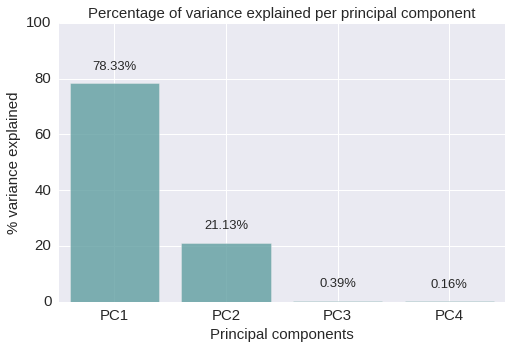

In [10]:
df = pd.read_table("./test_data/obs_normalised_filtered.tsv")
display(df.head())
PCA_var_plot(df,  variable_col='target_id', sample_col="sample", value_col="tpm", plot_style="ggplot", color="cadetblue", alpha=0.8, fontsize=15)

## PCA

In [6]:
help(PCA)

Help on function PCA in module pyBioPlot:

PCA(df, variable_col, sample_col, value_col, pcx=1, pcy=2, point_label=False, plot_style='ggplot', **kwargs)
    Plot a the frequence of contribution to the variance of the principal components from a dataframe in “stacked” or “record” format.
    Use matplotlib PCA implementation
    *  df
        A pandas dataframe with a least the 3 following columns:
        - variable_col = column containing variable identifiers (such as gene identifiers)
        - sample_col = column containing sample identifiers (such as experimental condition)
        - value_col = column containing quantitative numeric values
    *  variable_col
        Name or index of the column containing variable identifiers
    *  sample_col
        Name or index of the column containing sample identifiers
    *  value_col
        Name or index of the column containing values
    *  pcx
        Number of the component to plot on the x axis [ DEFAULT: 1 ]
    *  pcy
        Number

,1,2,3,4
sample,,,,
HeLaS3_cytosol_1,0.507107,0.501701,0.458975,0.529605
HeLaS3_cytosol_2,0.471982,0.491550,-0.631010,-0.370726
HeLaS3_nucleus_1,-0.548392,0.660616,0.333303,-0.389567
HeLaS3_nucleus_2,-0.468340,0.265068,-0.529223,0.655987


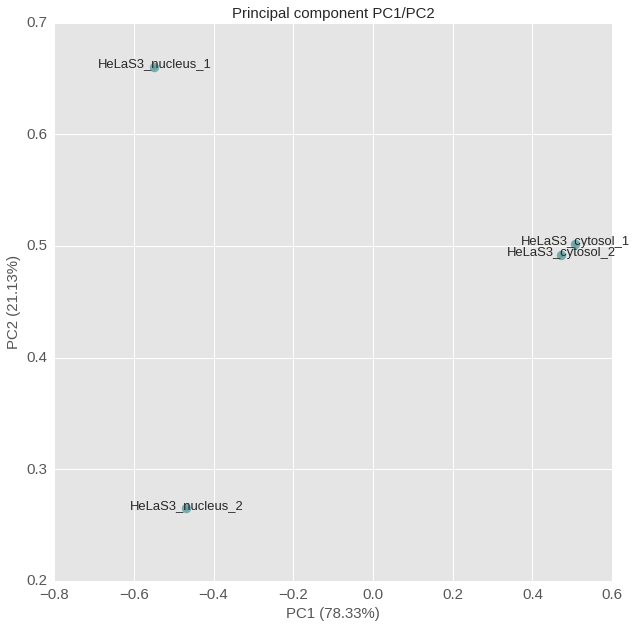

In [13]:
df = pd.read_table("./test_data/obs_normalised_filtered.tsv")
a= PCA(df, variable_col='target_id', sample_col="sample", value_col="tpm", pcx=1, pcy=2, point_label=True, plot_style="ggplot", fontsize=15, color= "cadetblue", alpha=0.8, linewidths=5)
a

## PCA2

In [10]:
help(PCA)

Help on function PCA in module pyBioPlot:

PCA(df, variable_col, sample_col, value_col, pcx=1, pcy=2, point_label=False, plot_style='ggplot', **kwargs)
    Plot a the frequence of contribution to the variance of the principal components from a dataframe in “stacked” or “record” format.
    Use matplotlib PCA implementation
    *  df
        A pandas dataframe with a least the 3 following columns:
        - variable_col = column containing variable identifiers (such as gene identifiers)
        - sample_col = column containing sample identifiers (such as experimental condition)
        - value_col = column containing quantitative numeric values
    *  variable_col
        Name or index of the column containing variable identifiers
    *  sample_col
        Name or index of the column containing sample identifiers
    *  value_col
        Name or index of the column containing values
    *  pcx
        Number of the component to plot on the x axis [ DEFAULT: 1 ]
    *  pcy
        Number

6


,1,2,3,4,5,6
sample,,,,,,
3T3_PUS1_KD_T0_1,149677.221161,-19408.854816,-6327.215333,-8028.444481,8025.114974,6.903200e-12
3T3_PUS1_KD_T0_2,-241127.416041,-6339.392362,22260.500173,-3894.063162,-211.793906,1.311460e-10
3T3_PUS1_KD_T0_3,-227510.147119,-21102.752705,-18784.762410,5295.513714,-1250.862741,-1.608302e-11
3T3_scramble_T0_1,250013.390790,-21068.735975,6637.841144,3205.349768,-7918.310202,2.696737e-11
3T3_scramble_T0_2,68587.240043,26652.092582,5609.842060,9745.066537,6483.683090,-1.151832e-10
3T3_scramble_T0_3,359.711165,41267.643275,-9396.205633,-6323.422375,-5127.831215,-1.455314e-11


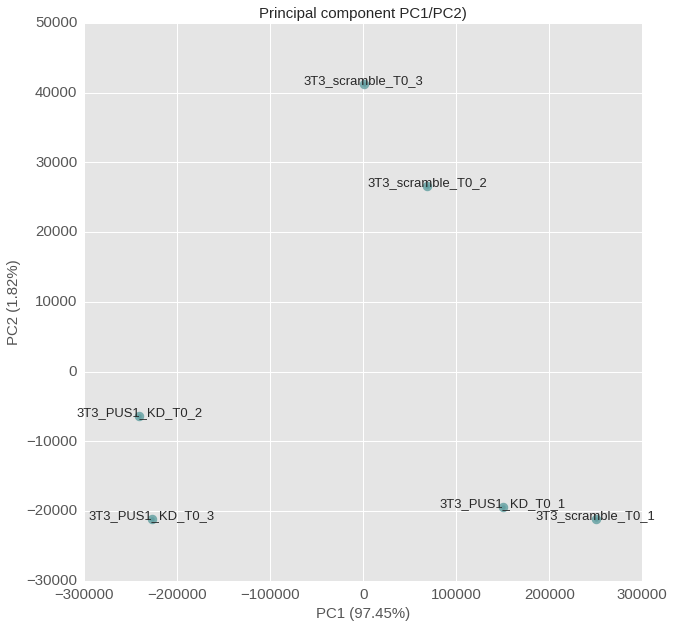

In [14]:
df = pd.read_table("./test_data/obs_normalised_filtered2.tsv")
a= PCA2(df, variable_col='target_id', sample_col="sample", value_col="tpm", pcx=1, pcy=2, point_label=True, plot_style="ggplot", fontsize=15, color= "cadetblue", alpha=0.8, linewidths=5)
a

---
# Generic utilities

## get_color_list

In [7]:
help(get_color_list)

Help on function get_color_list in module pyBioPlot:

get_color_list(n, gamma=1, colormap='brg')
    Return a list of l length with gradient colors from a given matplot lib colormap palette
    Before usage the palette can be tried with the *try_color_list* function
    *  n
        Number of color scalar in the list
    *  gamma
        Move the distribution toward the left (gamma<1) or the right (gamma>1)
    *  colormap
        colormap color palette from matplotlib package see http://matplotlib.org/examples/color/colormaps_reference.html
                        example : inferno magma hot blues cool spring winter brg ocean hsv jet ... [DEFAULT: brg]



In [17]:
a = get_color_list(n=3, gamma=2, colormap="brg")

for i in range(6):
    print(next(a))

(3.0757400999615529e-05, 0.0, 0.99996924259900033, 1.0)
(0.50392925797770083, 0.0, 0.49607074202229917, 1.0)
(0.0, 1.0, 0.0, 1.0)
(3.0757400999615529e-05, 0.0, 0.99996924259900033, 1.0)
(0.50392925797770083, 0.0, 0.49607074202229917, 1.0)
(0.0, 1.0, 0.0, 1.0)


## try_color_list

In [8]:
help(try_color_list)

Help on function try_color_list in module pyBioPlot:

try_color_list(n_color, n_values, gamma=1, colormap='brg')
    Test a palette generated by get_color_list
    * n_color
        Number of colour in the palette
    * n_values
        Number of values required (could be more that the number of colour but will cycle from the start)
    * gamma
        Move the distribution toward the left (gamma<1) or the right (gamma>1)
    * colormap
        Color palette from matplotlib package see http://matplotlib.org/examples/color/colormaps_reference.html
        Examples : inferno magma hot blues cool spring winter brg ocean hsv jet ... [DEFAULT: brg]



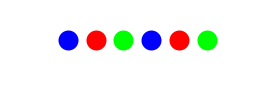

In [19]:
try_color_list(n_color=3, n_values=6, colormap="brg")

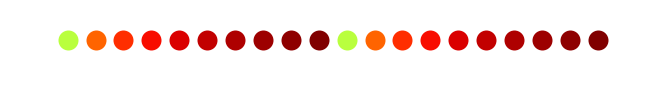

In [20]:
try_color_list(n_color=10, n_values=20, gamma=0.1, colormap="jet")

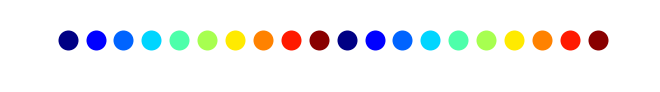

In [21]:
try_color_list(n_color=10, n_values=20, gamma=1, colormap="jet")

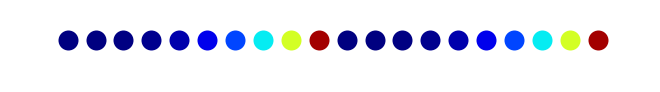

In [22]:
try_color_list(n_color=10, n_values=20, gamma=4, colormap="jet")

## plot_text

In [9]:
help(plot_text)

Help on function plot_text in module pyBioPlot:

plot_text(text, plot_len=20, align='center', **kwargs)
    Plot a text alone as graph. Useful to separate series of data plots in interactive session.
    * text
        Test message to plot
    * len_plot
        Length of the plotting area [DEFAULT: 20]
    * align
        Alignment of the text ['left' | 'right' | 'center' ] [DEFAULT: 'center']
    * kwargs
        Additional parameters from matplotlib.text.Text class see http://matplotlib.org/users/text_intro.html
        Examples = color, family, fontname, position...



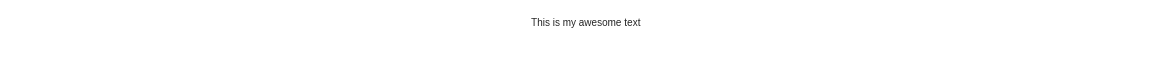

In [24]:
plot_text("This is my awesome text")

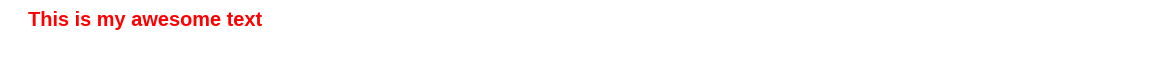

In [25]:
plot_text("This is my awesome text", align="left", color="red", fontsize=20, fontweight="bold")

## TESTS AND DEV